In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/vestiaire/vestiaire.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
import plotly.colors as pc

In [3]:
df= pd.read_csv('/kaggle/input/vestiaire/vestiaire.csv')
df.head(3)

product_id     product_type  \
0    43247626  Wool mini skirt   
1    43247441           Jacket   
2    43246517        Wool coat   

                                        product_name  \
0  Wool mini skirt Miu Miu Grey size S Internatio...   
1      Jacket Barbara Bui Navy size 42 FR in Cotton    
2  Wool coat Comme Des Garcons White size S Inter...   

                                 product_description  \
0  Miu Miu – Pleated mini skirt Size: 36 (S)  Wai...   
1  For selling nice women's suit Barbara Bui size...   
2  Magnificent boiled wool coat. I bought it in t...   

               product_keywords product_gender_target product_category  \
0           Miu Miu Wool Skirts                 Women   Women Clothing   
1    Barbara Bui Cotton Jackets                 Women   Women Clothing   
2  Comme Des Garcons Wool Coats                 Women   Women Clothing   

    product_season    product_condition  product_like_count  ...  \
0  Autumn / Winter           Never worn                34.0  ...   
1      All seasons  Very good condition                 1.0  ...   
2  Autumn / Winter  Very good condition                 2.0  ...   

   warehouse_name  seller_id  seller_username  usually_ships_within  \
0       Tourcoing   25775970  vitalii25775970                   NaN   
1       Tourcoing   13698770   olivia13698770                   NaN   
2       Tourcoing    6042365   cecilia6042365              1-2 days   

   seller_country  seller_products_sold seller_num_products_listed  \
0         Germany                   3.0                       14.0   
1         Belgium                   0.0                        0.0   
2           Spain                  58.0                       69.0   

  seller_community_rank seller_num_followers seller_pass_rate  
0                   0.0                 13.0              0.0  
1                   0.0                  8.0              0.0  
2                   0.0                 62.0             96.0  

[3 rows x 36 columns]

In [4]:
df.shape

(900514, 36)

In [5]:
#DATA CLEANING

In [6]:
df1 = df.copy()
df1.columns
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900514 entries, 0 to 900513
Data columns (total 36 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   product_id                  900514 non-null  int64  
 1   product_type                900514 non-null  object 
 2   product_name                900514 non-null  object 
 3   product_description         900507 non-null  object 
 4   product_keywords            899331 non-null  object 
 5   product_gender_target       900514 non-null  object 
 6   product_category            899331 non-null  object 
 7   product_season              900512 non-null  object 
 8   product_condition           900514 non-null  object 
 9   product_like_count          900514 non-null  float64
 10  sold                        900514 non-null  bool   
 11  reserved                    900514 non-null  bool   
 12  available                   900514 non-null  bool   
 13  in_stock      

In [7]:
(df1.isna().mean() * 100).sum()

20.50850958452617

20.5% falta

In [8]:
df1.isna().mean() * 100

product_id                     0.000000
product_type                   0.000000
product_name                   0.000000
product_description            0.000777
product_keywords               0.131369
product_gender_target          0.000000
product_category               0.131369
product_season                 0.000222
product_condition              0.000000
product_like_count             0.000000
sold                           0.000000
reserved                       0.000000
available                      0.000000
in_stock                       0.000000
should_be_gone                 0.000000
brand_id                       0.000000
brand_name                     0.000000
brand_url                      0.000000
product_material               0.000444
product_color                  0.000111
price_usd                      0.000000
seller_price                   0.000000
seller_earning                 0.000000
seller_badge                   0.000000
has_cross_border_fees          1.525351


usually_ships_within falta (17.2%). Sustituimos por el valor mas comun. El 3.3% restante se sustituye por la media o se elimina

In [9]:
# Filling missing values with the mode for categorical columns
df1['usually_ships_within'] = df1['usually_ships_within'].fillna(df1['usually_ships_within'].mode()[0])
df1['product_category'] = df1['product_category'].fillna(df1['product_category'].mode()[0])
df1['product_keywords'] = df1['product_keywords'].fillna(df1['product_keywords'].mode()[0])

# Filling missing values with the median for numerical columns
df1['buyers_fees'] = df1['buyers_fees'].fillna(df1['buyers_fees'].median())
df1[['has_cross_border_fees']].value_counts()

has_cross_border_fees
True                     886778
Name: count, dtype: int64

In [10]:
df1['has_cross_border_fees'].fillna(False, inplace=True)
print(f'Percentage of missing values: {(df1.isna().mean() * 100).sum().round(4)}')


Percentage of missing values: 0.0059


In [11]:
df1.dropna(inplace=True)
print(f'Percentage of missing values: {(df1.isna().mean() * 100).sum()}')


Percentage of missing values: 0.0


In [12]:
df1.shape


(900461, 36)

In [13]:
print(f'Amount of duplicates: {df1.duplicated().sum()}')


Amount of duplicates: 0


EDA

In [14]:
gender_count = df1['product_gender_target'].value_counts()

fig = go.Figure(data=[go.Pie(labels=gender_count.index, values=gender_count.values, 
                             hoverinfo='label+value', textinfo='percent',
                             textfont_size=20, marker=dict( 
                             line=dict(color='#000000', width=2)))])

fig.update_layout(title_text='Distribucion de genero', title_font_size=24)
fig.show()

In [15]:
top_10_brands_by_listings = df1['brand_name'].value_counts().head(10).reset_index()
top_10_brands_by_listings.columns = ['brand_name', 'count']

fig = px.bar(top_10_brands_by_listings, x='count', y='brand_name', 
             title='Top Marcas por cantidad de productos', 
             labels={'count': 'Number of Listings', 'brand_name': 'Brand Name'},
             color_discrete_sequence=['#ff5a28'],
             orientation='h')

fig.update_layout(
    title_font_size=24, 
    xaxis_title='Numero de productos', 
    yaxis_title='Marca',
    yaxis=dict(categoryorder='total ascending') 
)
fig.show()

In [16]:
likes_per_brand = df1.groupby('brand_name')['product_like_count'].sum().reset_index()
likes_per_brand = likes_per_brand.sort_values(by='product_like_count', ascending=False)
top_10_brands_by_likes = likes_per_brand.head(10)
fig = px.bar(top_10_brands_by_likes, x='product_like_count', y='brand_name', 
             title='Top Marcas por numero de likes', 
             labels={'product_like_count': 'Total Likes', 'brand_name': 'Marca'},
             color_discrete_sequence=['#ff5a28'],
             orientation='h')

fig.update_layout(title_font_size=24, xaxis_title='Total Likes', yaxis_title='Marca', yaxis=dict(categoryorder='total ascending'))
fig.show()

In [17]:
brand_stats = df.groupby('brand_name').agg(
    total_likes=('product_like_count', 'sum'),
    listing_count=('brand_name', 'count')
).reset_index()

# Calculate average likes per product
brand_stats['avg_likes_per_product'] = brand_stats['total_likes'] / brand_stats['listing_count']

sorted_by_listing_count = brand_stats.sort_values(by='listing_count', ascending=False).head(10)
by_avg = sorted_by_listing_count.sort_values(by='avg_likes_per_product', ascending=False)

fig = px.bar(by_avg, x='avg_likes_per_product', y='brand_name', 
             title='Top Marcas por cantidad media de likes', 
             labels={'avg_likes_per_product': 'Average Likes', 'brand_name': 'Brand Name'},
             color_discrete_sequence=['#ff5a28'],
             orientation='h')

fig.update_layout(title_font_size=24, xaxis_title='Media de likes', yaxis_title='Marca', yaxis=dict(categoryorder='total ascending'))
fig.show()

In [18]:
country_count = df1['seller_country'].value_counts().head(10).reset_index()
country_count.columns = ['Country', 'Count']

fig = px.bar(country_count, x='Country', y='Count', orientation='v', 
             title='Top 10 Paises por cantidad de productos vendidos', 
             labels={'Count': 'Count', 'Country': 'Country'},
             color_discrete_sequence=['#ff5a28'])

fig.update_layout(title_font_size=24, xaxis_title='Pais', yaxis_title='Ventas')
fig.show()

In [19]:
top_products = df1['product_type'].value_counts().head(20).reset_index()
top_products.columns = ['Product', 'Count']

fig = px.bar(top_products, x='Count', y='Product', orientation='h', 
             title='Top 20 Productos', 
             labels={'Count': 'Count', 'Product': 'Product'},
             color_discrete_sequence=['#ff5a28'])

fig.update_layout(title_font_size=24, xaxis_title='Cantidad', yaxis_title='Producto', yaxis={'categoryorder':'total ascending'})
fig.show()

In [20]:
product_category_count = df1['product_category'].value_counts().reset_index()
product_category_count.columns = ['Product', 'Count']

fig = px.bar(product_category_count, x='Count', y='Product', orientation='h', 
             title='Distribucion de productos por categoria', 
             labels={'Count': 'Count', 'Product': 'Product'},
             color_discrete_sequence=['#ff5a28'])

fig.update_layout(title_font_size=24, xaxis_title='Cantidad', yaxis_title='Producto', yaxis={'categoryorder':'total ascending'})
fig.show()

In [21]:
top_materials = df1['product_material'].value_counts().head(20).reset_index()
top_materials.columns = ['Material', 'Count']

fig = px.bar(top_materials, x='Count', y='Material', orientation='h', 
             title='Top Materialess', 
             labels={'Count': 'Count', 'Material': 'Material'},
             color_discrete_sequence=['#ff5a28'])
fig.update_layout(title_font_size=24, xaxis_title='Cantidad', yaxis_title='Material', yaxis={'categoryorder':'total ascending'})
fig.show()

In [22]:
top_colors = df1['product_color'].value_counts().head(20).reset_index()
top_colors.columns = ['Color', 'Count']

fig = px.bar(top_colors, x='Color', y='Count', 
             title='Top 20 Colores', 
             labels={'Count': 'Number of Products', 'Color': 'Product Color'},
             color_discrete_sequence=['#ff5a28'])

fig.update_layout(title_font_size=24, xaxis_title='Color', yaxis_title='Count')
fig.show()

In [23]:
categories_colors = df1.groupby('product_category')['product_color'].value_counts().reset_index(name='Count')
mens_clothing = categories_colors[(categories_colors['product_category'] == 'Men Clothing')]
womens_clothing = categories_colors[(categories_colors['product_category'] == 'Women Clothing')]

mens_clothing_top20 = mens_clothing.sort_values(by='Count', ascending=False).head(20)
womens_clothing_top20 = womens_clothing.sort_values(by='Count', ascending=False).head(20)

trace1 = go.Bar(
    x=mens_clothing_top20['product_color'],
    y=mens_clothing_top20['Count'],
    name='Men Clothing',
    marker=dict(color='#2875ff')  
)

trace2 = go.Bar(
    x=womens_clothing_top20['product_color'],
    y=womens_clothing_top20['Count'],
    name='Women Clothing',
    marker=dict(color='#ff5a28') 
)
data = [trace1, trace2]

layout = go.Layout(
    title='Top 20 Colores en ropa de Hombre y Mujer',
    xaxis=dict(title='Color'),
    yaxis=dict(title='Count'),
    barmode='group'
)
fig = go.Figure(data=data, layout=layout)
fig.show()

In [24]:
condition_counts = df1['product_condition'].value_counts().reset_index()
condition_counts.columns = ['Product Condition', 'Count']

fig = px.bar(condition_counts, x='Product Condition', y='Count', 
             title='Distribucion de productos por estado', 
             labels={'Count': 'Number of Products', 'Product Condition': 'Condition'},
             color_discrete_sequence=['#ff5a28'])

fig.update_layout(title_font_size=24, xaxis_title='Estado del articulo', yaxis_title='Count')
fig.show()

In [25]:
seasons_count = df1['product_season'].value_counts()

fig = go.Figure(data=[go.Pie(labels=seasons_count.index, values=seasons_count.values, 
                             hoverinfo='label+value', textinfo='percent',
                             textfont_size=20, marker=dict(line=dict(color='#000000', width=2)))])

fig.update_layout(title_text='Distribucion por temporada', title_font_size=24)
fig.show()

In [26]:
# Filtramos para excluir los productos cuyo 'product_type' contenga la palabra 'watch'
brand_price_filtered = df1[~df1['product_type'].str.contains('watch', case=False, na=False)]

# Realizamos el agrupamiento y cálculo del precio promedio por marca y tipo de producto, excluyendo los relojes
brand_price_filtered = brand_price_filtered.groupby(['brand_name', 'product_type'])['price_usd'].mean().reset_index()

# Ordenamos por el precio promedio
brand_price_filtered = brand_price_filtered.sort_values(by='price_usd', ascending=False)

# Tomamos los 10 primeros
top_10_brand_product_prices = brand_price_filtered.head(10)

# Creamos el gráfico de barras
import plotly.express as px
fig = px.bar(top_10_brand_product_prices, x='brand_name', y='price_usd',
             color='product_type',
             title='Top 10 Marcas por precio medio (sin incluir relojes)',
             labels={'brand_name': 'Brand', 'price_usd': 'Precio medio (USD)', 'product_type': 'Product Type'},
             color_discrete_sequence=['#ff5a28'])

# Ajustamos el diseño del gráfico
fig.update_layout(title_font_size=24, xaxis_title='Marca', yaxis_title='Precio medio (USD)')
fig.show()



In [27]:
brand_price = df1.groupby(['brand_name', 'product_type'])['price_usd'].mean().reset_index()
brand_price = brand_price.sort_values(by='price_usd', ascending=False)
top_10_brand_product_prices = brand_price.head(10)

fig = px.bar(top_10_brand_product_prices, x='brand_name', y='price_usd',
             color='product_type',
             title='Top 10 Marcas por precio medio',
             labels={'brand_name': 'Brand', 'price_usd': 'Average Price (USD)', 'product_type': 'Product Type'},
             color_discrete_sequence=['#ff5a28'])

fig.update_layout(title_font_size=24, xaxis_title='Marca', yaxis_title='Precio medio (USD)')
fig.show()

In [28]:
category_price = df1.groupby(['product_category'])['price_usd'].median().reset_index()

fig = px.bar(category_price, x='product_category', y='price_usd',
             title='Precio medio por categoria',
             labels={'product_category': 'Product Category', 'price_usd': 'Median Price (USD)'},
             color_discrete_sequence=['#ff5a28'])

fig.update_layout(title_font_size=24, xaxis_title='Categoria', yaxis_title='Precio medio (USD)', 
                  xaxis={'categoryorder':'total descending'}, 
                  template='plotly_white')
fig.show()

In [29]:
fig = px.histogram(df1, x='price_usd', nbins=50, title='Distribucion de precios', color_discrete_sequence=['#ff5a28'])
fig.update_layout(title_font_size=24, xaxis_title='Precio en USD', yaxis_title='Frecuencia', yaxis_type='log')
fig.show()

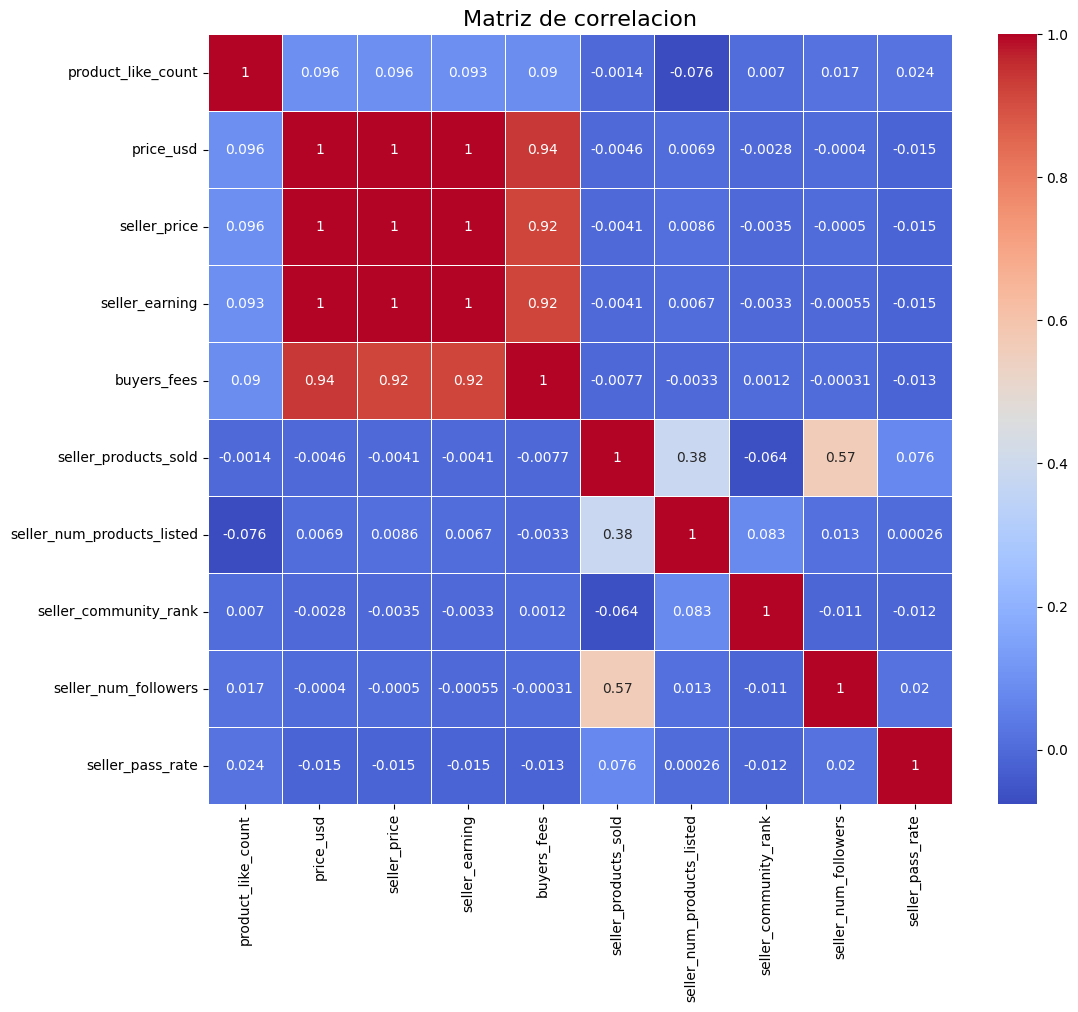

In [30]:
numerical_columns = df1.select_dtypes(include=np.number)
numerical_columns = numerical_columns[['product_like_count','price_usd', 'seller_price', 'seller_earning', 'buyers_fees', 'seller_products_sold', 'seller_num_products_listed', 'seller_community_rank', 'seller_num_followers', 'seller_pass_rate']]
correlation_matrix = numerical_columns.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de correlacion', fontsize=16)
plt.show()

In [31]:
# Agrupar por vendedor (seller_id) y sumar los productos vendidos y el dinero total generado
top_sellers = df1.groupby(['seller_id', 'seller_country'])[['seller_products_sold', 'seller_earning']].sum().reset_index()

# Ordenamos los vendedores por dinero generado (de mayor a menor)
top_sellers = top_sellers.sort_values(by='seller_earning', ascending=False)

# Tomamos los 50 primeros
top_50_sellers = top_sellers.head(50)

# Mostrar la tabla de los top 50 vendedores
import pandas as pd
display(top_50_sellers)


seller_id  seller_country  seller_products_sold  seller_earning
84208    13276748           Japan             5287839.0      8039462.39
27030     4153869   United States              102912.0      3759465.10
103500   16774308           Italy             7020072.0      2831621.27
99527    16059674         Germany                8316.0      2727521.16
40492     6633364   United States            29560222.0      2257378.78
51954     8573172   United States               20076.0      2030084.60
52011     8580538           Japan                7685.0      2023312.51
100385   16200050   United States              465898.0      1992440.85
82214    12866189         Germany                6068.0      1778796.24
101855   16465877           Japan              231660.0      1659002.65
144630   22899198       Hong Kong               32402.0      1625745.56
38806     6324083           Macau               16808.0      1475496.94
123911   19227665           Japan                 284.0      1464372.67
84640    13364481           Italy               99100.0      1123118.12
70652    11080210           Japan            10811469.0       966106.78
45112     7559902   United States               10608.0       946812.89
145921   23036990           Japan                3360.0       902015.14
64019    10056903           Japan            46515463.0       884571.76
106577   17220628           Spain              768768.0       870534.63
120551   18816151   United States                 468.0       856609.00
84718    13379591           Japan               48960.0       835429.02
104110   16886144   United States               47600.0       826178.50
106085   17148939   United States                 574.0       821358.57
100658   16251621  United Kingdom                   0.0       763051.29
84883    13410407           Japan              107630.0       754462.72
38817     6325660           Macau                4532.0       743833.21
114404   18214834          Sweden              427378.0       741315.19
98655    15886961   United States             4411296.0       737036.80
15871     2190859   United States             2117584.0       731128.70
49709     8288847       Hong Kong               13568.0       712268.80
103859   16846467   United States                   0.0       689615.60
97175    15622481          Poland             9207066.0       651179.02
85612    13556382          Russia                9102.0       646338.33
98868    15930056          Greece                3042.0       624930.96
112236   17985014   United States                5728.0       616219.11
49064     8196767       Hong Kong                2737.0       572209.18
103192   16711039           Japan                9174.0       557825.54
55007     8938049           Japan               91506.0       537763.28
51733     8543038           Japan              284444.0       510919.04
16542     2305413           Italy                  48.0       509294.72
100010   16147250   United States             2352560.0       488674.99
56110     9071862         Germany           145182340.0       476569.36
15969     2207362           Spain                8526.0       467055.87
91336    14639016         Belgium              228480.0       465467.69
15935     2200888           Japan                4506.0       459004.06
104919   16996825          France              111044.0       427496.49
136839   21760919         Belgium                 720.0       427110.58
84204    13276602           Japan              385792.0       425848.37
47479     7958250         Germany             2023397.0       423208.91
27122     4174175         Germany             3297322.0       408080.70

In [32]:
from sklearn.cluster import KMeans
import pandas as pd

# Suponiendo que tienes el DataFrame 'top_sellers' con columnas como 'seller_products_sold' y 'seller_earning'
# Puedes ajustar estas columnas según las que consideres relevantes

# Selección de variables para clustering (productos vendidos y dinero generado)
X = top_sellers[['seller_products_sold', 'seller_earning']]

# Normalización de las variables
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# K-Means clustering con 5 clusters (puedes ajustar el número de clusters según el análisis)
kmeans = KMeans(n_clusters=5, random_state=42)
top_sellers['cluster'] = kmeans.fit_predict(X_scaled)

# Mostrar los resultados
print(top_sellers.head())

        seller_id seller_country  seller_products_sold  seller_earning  \
84208    13276748          Japan             5287839.0      8039462.39   
27030     4153869  United States              102912.0      3759465.10   
103500   16774308          Italy             7020072.0      2831621.27   
99527    16059674        Germany                8316.0      2727521.16   
40492     6633364  United States            29560222.0      2257378.78   

        cluster  
84208         4  
27030         2  
103500        2  
99527         2  
40492         3  


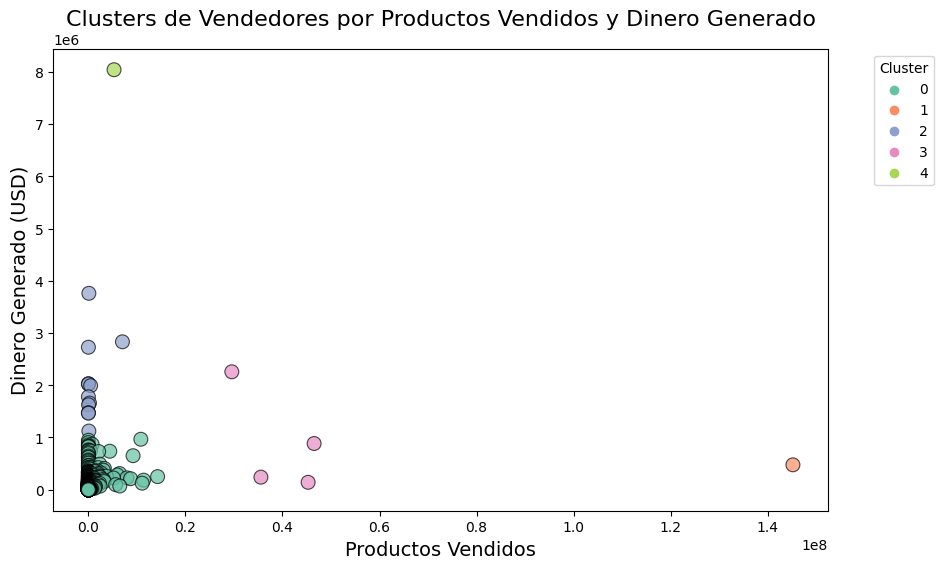

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Suponiendo que has generado un DataFrame 'top_sellers' con la columna 'cluster'
# Usamos los valores de 'seller_products_sold' y 'seller_earning' para la visualización

plt.figure(figsize=(10, 6))
sns.scatterplot(x='seller_products_sold', y='seller_earning', hue='cluster', palette='Set2', data=top_sellers, s=100, edgecolor='black', alpha=0.7)

plt.title('Clusters de Vendedores por Productos Vendidos y Dinero Generado', fontsize=16)
plt.xlabel('Productos Vendidos', fontsize=14)
plt.ylabel('Dinero Generado (USD)', fontsize=14)
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [34]:
from sklearn.cluster import KMeans
import pandas as pd

# Suponiendo que tienes el DataFrame 'df' con las columnas 'price_usd' y 'product_type'
# Puedes ajustar estas columnas según lo que desees agrupar

# Selección de variables para clustering (precio y tipo de producto)
X = df[['price_usd', 'product_type']]

# Convierte la columna categórica 'product_type' a valores numéricos
X['product_type'] = X['product_type'].astype('category').cat.codes

# Normalización de las variables
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# K-Means clustering con 5 clusters (ajustar según sea necesario)
kmeans = KMeans(n_clusters=5, random_state=42)
df['product_cluster'] = kmeans.fit_predict(X_scaled)

# Mostrar los resultados
print(df.head())


   product_id            product_type  \
0    43247626         Wool mini skirt   
1    43247441                  Jacket   
2    43246517               Wool coat   
3    43246507              Mini skirt   
4    43246417  Vegan leather trousers   

                                        product_name  \
0  Wool mini skirt Miu Miu Grey size S Internatio...   
1      Jacket Barbara Bui Navy size 42 FR in Cotton    
2  Wool coat Comme Des Garcons White size S Inter...   
3     Mini skirt MSGM Black size 38 IT in Polyester    
4  Vegan leather trousers LVIR Black size 36 FR i...   

                                 product_description  \
0  Miu Miu – Pleated mini skirt Size: 36 (S)  Wai...   
1  For selling nice women's suit Barbara Bui size...   
2  Magnificent boiled wool coat. I bought it in t...   
3  MSGM Skirt Black Printed Raw-Edge & Embroidere...   
4  LVIR black grained faux leather trousers size ...   

               product_keywords product_gender_target product_category  \
0    

In [35]:
from sklearn.decomposition import PCA

# Usamos PCA para reducir las características a 2D para la visualización
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(df[['price_usd', 'product_type']])

# Creamos el DataFrame con las coordenadas reducidas
df_pca = pd.DataFrame(X_reduced, columns=['PCA1', 'PCA2'])
df_pca['cluster'] = df['product_cluster']

# Visualización de los clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='cluster', palette='Set1', data=df_pca, s=100, edgecolor='black', alpha=0.7)

plt.title('Clusters de Productos por Precio y Tipo', fontsize=16)
plt.xlabel('Componente Principal 1', fontsize=14)
plt.ylabel('Componente Principal 2', fontsize=14)
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


ValueError: could not convert string to float: 'Wool mini skirt'

In [36]:
from sklearn.cluster import KMeans
import pandas as pd

# Suponiendo que tienes el DataFrame 'top_sellers' con las columnas 'seller_country' y 'seller_products_sold'
# La variable 'seller_country' será transformada en valores numéricos

# Convertimos la columna 'seller_country' a valores numéricos usando LabelEncoder
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
top_sellers['country_encoded'] = encoder.fit_transform(top_sellers['seller_country'])

# Selección de variables para clustering (ubicación y productos vendidos)
X = top_sellers[['country_encoded', 'seller_products_sold']]

# Normalización de las variables
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# K-Means clustering con 5 clusters (ajustar según sea necesario)
kmeans = KMeans(n_clusters=5, random_state=42)
top_sellers['location_cluster'] = kmeans.fit_predict(X_scaled)

# Mostrar los resultados
print(top_sellers.head())


        seller_id seller_country  seller_products_sold  seller_earning  \
84208    13276748          Japan             5287839.0      8039462.39   
27030     4153869  United States              102912.0      3759465.10   
103500   16774308          Italy             7020072.0      2831621.27   
99527    16059674        Germany                8316.0      2727521.16   
40492     6633364  United States            29560222.0      2257378.78   

        cluster  country_encoded  location_cluster  
84208         4               36                 4  
27030         2               86                 2  
103500        2               35                 4  
99527         2               22                 0  
40492         3               86                 3  


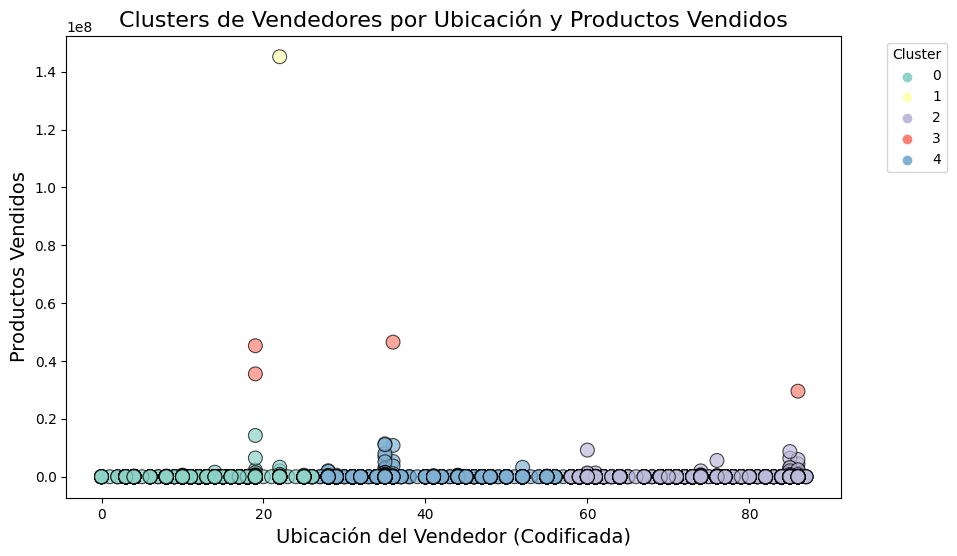

In [37]:
# Visualización de los clusters con la ubicación y los productos vendidos
plt.figure(figsize=(10, 6))
sns.scatterplot(x='country_encoded', y='seller_products_sold', hue='location_cluster', palette='Set3', data=top_sellers, s=100, edgecolor='black', alpha=0.7)

plt.title('Clusters de Vendedores por Ubicación y Productos Vendidos', fontsize=16)
plt.xlabel('Ubicación del Vendedor (Codificada)', fontsize=14)
plt.ylabel('Productos Vendidos', fontsize=14)
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Crear un LabelEncoder y ajustar a la columna de países
encoder = LabelEncoder()
top_sellers['country_encoded'] = encoder.fit_transform(top_sellers['seller_country'])

# Mostrar el mapeo de países a sus códigos
country_mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
print(country_mapping)
